**Enter your Names:**  William Yao, William Phan, Emilio Rivera, Ari Anugu

---


    
**Enter your PIDs:**  syao2017, wphan21, emilio532, anugu2
    

# Project 1: Covid Tracker

#### Description: 
We are planning to find different correlations between COVID-19 vaccinations and the spread of the virus in the United States. While conducting such an analysis, we will also consider how different demographic groups are affected based on vaccination rates, political leanings, and other factors.
 
### Questions: 
Which state handled COVID-19 the best ?

Many states handled COVID-19 differently, by enforcing a variety of mandates and providing a variety of resources to people, such as masks and vaccinations. 

There are many ways we can determine which states handled COVID-19 the best. For instance, we can consider factors such as vaccination rates per state, vaccination mandates, mask mandates, and more. In our analysis, we will attempt to rank how well a state handled COVID-19 by figuring out how well the virus was contained. Although we can consider which state had the lowest number of cases, such a number would be an inadequate measure. 

We will also have to take into account factors such as population and population density. Additionally, factors such as demographics may also be important. In our project, we will also attempt to answer the following questions. Does higher vaccination rates in different states lead to a reduction in the cases and deaths from COVID-19? How are different demographic groups (race, ethnicity, age, sex, etc.) affected by the virus when vaccinated or unvaccinated? If so, why are specific states more likely to have a faster spread of the virus? 

Our inference is that states with higher vaccination rates and with more mandates were able to contain the virus more effectively. Additionally, population density will also contribute to how well a state was at containing the virus.

#### Potential Data Points: 
High density areas, hospitalizations, demographics, rate of vaccinations, political demographic
https://www.cdc.gov/nchs/nvss/vsrr/covid_weekly/index.htm
https://www.cdc.gov/coronavirus/2019-ncov/science/forecasting/mathematical-modeling-outbreak.html
https://covid.cdc.gov/covid-data-tracker/#trends_dailycases
kff.org/state_category/covid-19/

<i>Vaccination data</i>: 
https://data.cdc.gov/Vaccinations/COVID-19-Vaccinations-in-the-United-States-Jurisdi/unsk-b7fc

<i>Cases and Death data</i>:
https://data.cdc.gov/Case-Surveillance/United-States-COVID-19-Cases-and-Deaths-by-State-o/9mfq-cb36


Possible questions:
    which state is most likely to get covid?
    Where will covid most likely appear next?
    which state best handled covid?

### Analysis

In [1]:
#Libraries
import requests, pandas
import numpy
import matplotlib
import matplotlib.pyplot as plt
import sklearn.metrics.pairwise
import sklearn.cluster
import sklearn.decomposition

from sklearn.linear_model import LinearRegression

cCasesAndDeaths = pandas.read_csv('cumalitiveCasesAndDeaths.csv')
DCasesAndDeaths = pandas.read_csv('dailyCasesAndDeaths.csv')
vaccinations = pandas.read_csv('vaccinesDelivered.csv')

#Date generated: Tue Apr 05 2022 14:55:59 GMT-0400 (Eastern Daylight Time) for all tables

cCasesAndDeaths.shape, DCasesAndDeaths.shape, vaccinations.shape

((65, 7), (65, 9), (60, 8))

In [2]:
cCasesAndDeaths

,Location,Number of COVID-19 Cases,"COVID-19 Cases per 1,000,000 Population",Deaths from COVID-19,"COVID-19 Deaths per 1,000,000 Population",COVID-19 Fatality Rate,Footnotes
0,United States,"78,798,989",NaN,"944,830",NaN,0.012,1.0
1,Alabama,"1,276,580",NaN,"18,102",NaN,0.014,NaN
2,Alaska,"237,754",NaN,"1,163",NaN,0.005,NaN
3,Arizona,"1,973,479",NaN,"27,876",NaN,0.014,NaN
4,Arkansas,"817,798",NaN,"10,381",NaN,0.013,NaN
...,...,...,...,...,...,...,...
60,"Johns Hopkins University, [COVID-19 Dashboard ...",NaN,NaN,NaN,NaN,NaN,NaN
61,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,2020 Population data from Annual Population Es...,NaN,NaN,NaN,NaN,NaN,NaN
63,Footnotes,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
DCasesAndDeaths

,Location,Daily Change in Cumulative Cases,Daily Cases (7-Day Rolling Average),Daily Cases Per Million Population,Percent Change in Cases Over 14 Days,Daily Change in Cumulative Deaths,Daily Deaths (7-Day Rolling Average),Daily Deaths Per Million Population,Percent Change in Deaths Over 14 Days
0,United States,"65,491","74,750",227.0,-0.646,"2,941","1,742",5.0,-0.325
1,Alabama,"1,225",938,191.0,-0.761,95,45,9.0,0.098
2,Alaska,0,421,575.0,-0.679,0,3,4.0,0.048
3,Arizona,"1,801","1,945",262.0,-0.635,86,68,9.0,0.122
4,Arkansas,571,876,289.0,-0.488,40,21,7.0,-0.284
...,...,...,...,...,...,...,...,...,...
60,"As of July 2021, many states report their COVI...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,Sources,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,"Johns Hopkins University, [COVID-19 Dashboard ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
vaccinations

,Location,Total COVID-19 Vaccines Delivered,Total COVID-19 Vaccines Administered,Share of Delivered Vaccines That Have Been Administered,Number of People Who Have Been Vaccinated with At Least One Dose,Share of Population Vaccinated with At Least One Dose,Number of People Who Have Been Fully Vaccinated,Share of Population Fully Vaccinated
0,United States,"688,186,745","551,855,907",0.80200,"253,307,984",0.763,"215,253,201",0.648
1,Alabama,"9,229,440","6,087,103",0.66000,"3,031,464",0.618,"2,459,363",0.502
2,Alaska,"1,436,865","1,093,808",0.76100,"500,864",0.685,"445,530",0.609
3,Arizona,"14,019,320","11,508,661",0.82100,"5,191,587",0.713,"4,364,444",0.600
4,Arkansas,"5,845,920","4,081,816",0.69800,"1,981,905",0.657,"1,612,690",0.534
5,California,"85,679,525","71,306,336",0.83200,"32,284,670",0.817,"27,773,615",0.703
6,Colorado,"11,822,075","10,299,034",0.87100,"4,507,596",0.783,"3,980,992",0.691
7,Connecticut,"8,282,535","7,277,732",0.87900,"3,345,245",0.938,"2,771,081",0.777
8,Delaware,"2,215,155","1,729,273",0.78100,"794,932",0.816,"656,886",0.675
9,District of Columbia,"1,771,405","1,412,520",0.79700,"670,350",0.950,"503,427",0.713


# Data Cleaning

<i>**Goal**</i>: 
* We will clean up any data that will be used in our analysis

<i>What will we change?</i>
* Replace extreme values
* Make sure all data units are correct 
* Make sure all values in the table have the correct data types.
* Replace NaN values with a value that better suits the data
* Get rid of any messy text such as punctionation, whitespace, etc.

In [5]:
#merge all the data together
merged = cCasesAndDeaths.merge(DCasesAndDeaths, how = 'inner', on = ['Location'])
merged = merged.merge(vaccinations, how = 'inner', on = ['Location'])
merged.dropna(axis = 1)

,Location,Number of COVID-19 Cases,Deaths from COVID-19,COVID-19 Fatality Rate,Daily Change in Cumulative Cases,Daily Cases (7-Day Rolling Average),Percent Change in Cases Over 14 Days,Daily Change in Cumulative Deaths,Daily Deaths (7-Day Rolling Average),Total COVID-19 Vaccines Delivered,Total COVID-19 Vaccines Administered,Share of Delivered Vaccines That Have Been Administered,Number of People Who Have Been Vaccinated with At Least One Dose,Share of Population Vaccinated with At Least One Dose,Number of People Who Have Been Fully Vaccinated,Share of Population Fully Vaccinated
0,United States,"78,798,989","944,830",0.012,"65,491","74,750",-0.646,"2,941","1,742","688,186,745","551,855,907",0.80200,"253,307,984",0.763,"215,253,201",0.648
1,Alabama,"1,276,580","18,102",0.014,"1,225",938,-0.761,95,45,"9,229,440","6,087,103",0.66000,"3,031,464",0.618,"2,459,363",0.502
2,Alaska,"237,754","1,163",0.005,0,421,-0.679,0,3,"1,436,865","1,093,808",0.76100,"500,864",0.685,"445,530",0.609
3,Arizona,"1,973,479","27,876",0.014,"1,801","1,945",-0.635,86,68,"14,019,320","11,508,661",0.82100,"5,191,587",0.713,"4,364,444",0.600
4,Arkansas,"817,798","10,381",0.013,571,876,-0.488,40,21,"5,845,920","4,081,816",0.69800,"1,981,905",0.657,"1,612,690",0.534
5,California,"8,946,146","84,728",0.009,"14,179","9,527",-0.698,260,163,"85,679,525","71,306,336",0.83200,"32,284,670",0.817,"27,773,615",0.703
6,Colorado,"1,309,778","11,750",0.009,"1,427","1,473",-0.472,21,11,"11,822,075","10,299,034",0.87100,"4,507,596",0.783,"3,980,992",0.691
7,Connecticut,"721,954","10,443",0.014,458,556,-0.430,5,17,"8,282,535","7,277,732",0.87900,"3,345,245",0.938,"2,771,081",0.777
8,Delaware,"256,207","2,703",0.011,822,252,-0.381,0,7,"2,215,155","1,729,273",0.78100,"794,932",0.816,"656,886",0.675
9,District of Columbia,"134,214","1,317",0.010,100,90,-0.608,0,1,"1,771,405","1,412,520",0.79700,"670,350",0.950,"503,427",0.713


In [6]:
#grab specific columns we want to examine

data = merged[['Location', 'Number of COVID-19 Cases', 'Deaths from COVID-19', 'Total COVID-19 Vaccines Administered', 'Daily Change in Cumulative Deaths']]
df = data.copy()

#Remove commas and make data type to an int for various columns
df['Number of COVID-19 Cases'] = data['Number of COVID-19 Cases'].map(lambda s: int(s.replace(',', '')))
df['Deaths from COVID-19'] = data['Deaths from COVID-19'].map(lambda s: int(s.replace(',', '')))
df['Total COVID-19 Vaccines Administered'] = data['Total COVID-19 Vaccines Administered'].map(lambda s: int(s.replace(',', '')))
df['Daily Change in Cumulative Deaths'] = data['Daily Change in Cumulative Deaths'].map(lambda s: int(s.replace(',', '')))

df

,Location,Number of COVID-19 Cases,Deaths from COVID-19,Total COVID-19 Vaccines Administered,Daily Change in Cumulative Deaths
0,United States,78798989,944830,551855907,2941
1,Alabama,1276580,18102,6087103,95
2,Alaska,237754,1163,1093808,0
3,Arizona,1973479,27876,11508661,86
4,Arkansas,817798,10381,4081816,40
5,California,8946146,84728,71306336,260
6,Colorado,1309778,11750,10299034,21
7,Connecticut,721954,10443,7277732,5
8,Delaware,256207,2703,1729273,0
9,District of Columbia,134214,1317,1412520,0


In [7]:
#grab specific columns we want to examine
data1 = merged[['Location', 'Number of COVID-19 Cases', 'Deaths from COVID-19', 'Total COVID-19 Vaccines Administered', 'Daily Change in Cumulative Deaths']]
data1 = data1[1:]
data1

,Location,Number of COVID-19 Cases,Deaths from COVID-19,Total COVID-19 Vaccines Administered,Daily Change in Cumulative Deaths
1,Alabama,"1,276,580","18,102","6,087,103",95
2,Alaska,"237,754","1,163","1,093,808",0
3,Arizona,"1,973,479","27,876","11,508,661",86
4,Arkansas,"817,798","10,381","4,081,816",40
5,California,"8,946,146","84,728","71,306,336",260
6,Colorado,"1,309,778","11,750","10,299,034",21
7,Connecticut,"721,954","10,443","7,277,732",5
8,Delaware,"256,207","2,703","1,729,273",0
9,District of Columbia,"134,214","1,317","1,412,520",0
10,Florida,"5,818,706","69,553","36,035,360",598


In [8]:
#quantatify the data to make it usable
quantative = data1.copy()
columns = ['Number of COVID-19 Cases', 'Deaths from COVID-19', 'Total COVID-19 Vaccines Administered', 'Daily Change in Cumulative Deaths']

#clean the data so that we remove all commas, and can convert to int values later
quantative = quantative[:].astype('string')
quantative = quantative.apply(lambda x: x.str.replace(',', ''))
quantative[columns] = quantative.iloc[:, 1:].astype(int)
dMatrix = pandas.DataFrame(index = quantative.Location, columns = quantative.Location, dtype = float)
#create a copy so we can preserve the Locations column with all State names
copy = quantative.copy()
#set the index to be the state names
quantative = quantative.set_index('Location')

#normalize the data
norm = (quantative - quantative.mean()) / quantative.std()
norm
#create a distance matrix so that we can see distance correlations between states
for r in range(len(dMatrix.index)):
    for c in range(r):
        dMatrix.iloc[r, c] = dMatrix.iloc[c, r] = numpy.linalg.norm(norm.iloc[r] - norm.iloc[c])

dMatrix = dMatrix.fillna(0)
dMatrix


Location,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,American Samoa,Guam,Northern Mariana Islands,Puerto Rico
Location,,,,,,,,,,,,,,,,,,,,,
Alabama,0.000000,1.445582,0.772499,0.728530,7.793453,0.854347,1.012354,1.384244,1.461169,6.574382,...,1.489330,0.808503,0.980938,0.970112,0.501993,1.459327,1.565162,1.532184,1.561352,1.180084
Alaska,1.445582,0.000000,2.045208,0.730126,8.998264,1.118464,0.733484,0.092345,0.066256,7.986529,...,0.081582,1.942127,1.353998,0.487511,1.370772,0.062977,0.170890,0.135959,0.165327,0.513135
Arizona,0.772499,2.045208,0.000000,1.328161,7.088034,1.096026,1.421846,1.970406,2.061180,6.160928,...,2.093296,0.634585,1.071144,1.620617,0.798234,2.064182,2.186825,2.151419,2.182490,1.688014
Arkansas,0.728530,0.730126,1.328161,0.000000,8.342700,0.606007,0.428647,0.663433,0.748128,7.289470,...,0.778720,1.277315,0.867525,0.304246,0.702899,0.747469,0.864977,0.829847,0.860634,0.523009
California,7.793453,8.998264,7.088034,8.342700,0.000000,7.886786,8.308203,8.925574,9.013649,4.756165,...,9.041104,7.147936,7.673462,8.623301,7.668686,9.031337,9.154156,9.117452,9.149502,8.541241
Colorado,0.854347,1.118464,1.096026,0.606007,7.886786,0.000000,0.452941,1.044624,1.134206,7.134035,...,1.162321,0.980878,0.288456,0.840524,0.479413,1.153090,1.278214,1.241672,1.273392,0.685682
Connecticut,1.012354,0.733484,1.421846,0.428647,8.308203,0.452941,0.000000,0.648097,0.738113,7.485103,...,0.770085,1.341473,0.688837,0.548973,0.819332,0.756798,0.882410,0.847740,0.878050,0.351982
Delaware,1.384244,0.092345,1.970406,0.663433,8.925574,1.044624,0.648097,0.000000,0.102429,7.932285,...,0.138169,1.874152,1.282192,0.437836,1.307081,0.110748,0.240219,0.205024,0.235283,0.446956
District of Columbia,1.461169,0.066256,2.061180,0.748128,9.013649,1.134206,0.738113,0.102429,0.000000,7.999576,...,0.038665,1.950113,1.364546,0.499726,1.390575,0.059144,0.147054,0.113124,0.142517,0.508673


# Visualization

* We will make a line graph that shows the cases and deaths overtime
* Line graph showing vaccination rate overtime
* Another line graph showing the trends of the number of cases, deaths, and vaccinations. Such graph will help us to observe any useful patterns between vaccinations and COVID-19 spread.
* We will also make use of scatter plots and bargraphs in order to find more useful patterns in our analysis.

(0.0, 10000000.0)

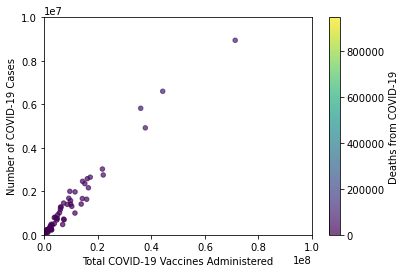

In [9]:
ax = df.plot.scatter('Total COVID-19 Vaccines Administered', 'Number of COVID-19 Cases',c = 'Deaths from COVID-19', colormap=plt.cm.viridis, sharex = False, alpha = 0.7)
ax.set_xlim(0, 100000000)
ax.set_ylim(0, 10000000)

<AxesSubplot:xlabel='Location'>

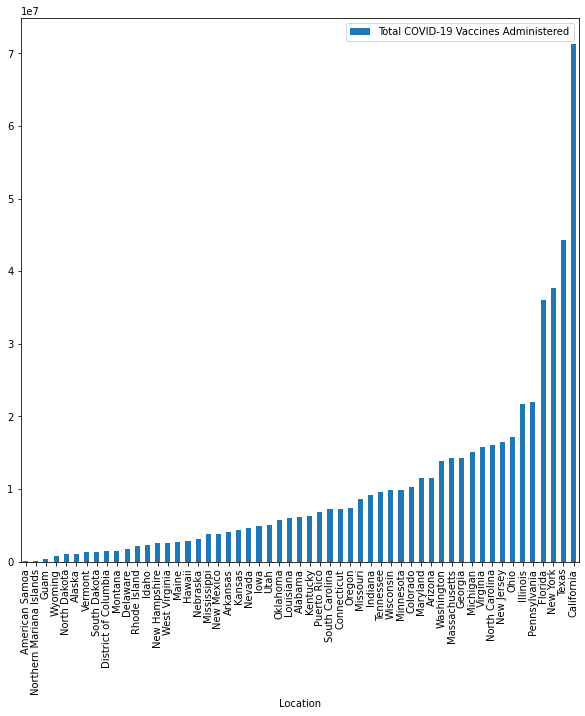

In [10]:

#Create a bar graph that show the relationship between 
#the vaccines administed in each state

df2 = df.copy()
df2.drop(0, inplace=True)
df2.sort_values('Total COVID-19 Vaccines Administered').plot.bar('Location', 'Total COVID-19 Vaccines Administered', figsize=(10,10))

<AxesSubplot:xlabel='Location'>

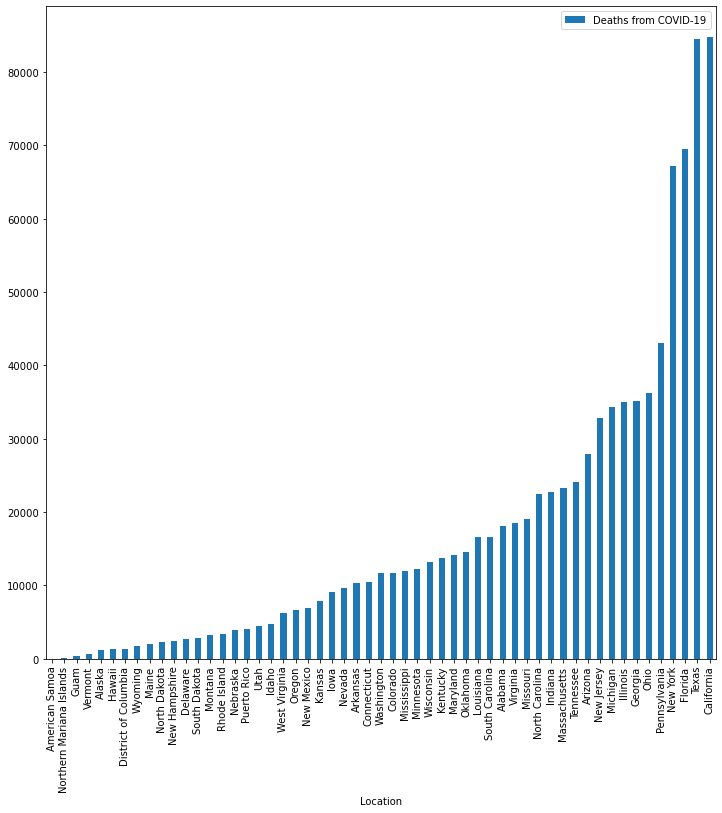

In [11]:
#Create a bar graph that show the relationship between 
#the deaths in each state
df2.sort_values('Deaths from COVID-19').plot.bar('Location', 'Deaths from COVID-19', figsize=(12,12))

<AxesSubplot:xlabel='Location'>

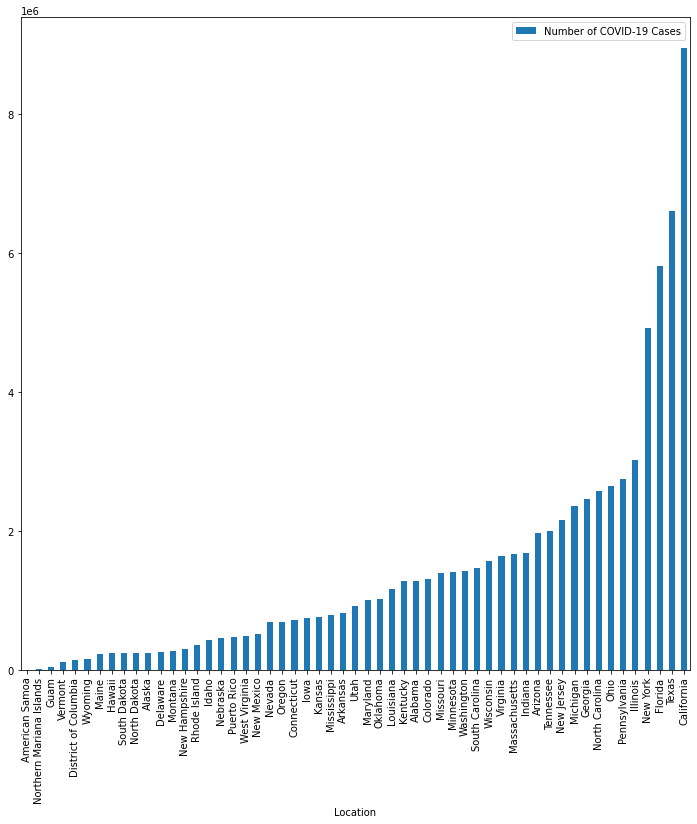

In [12]:
#Create a bar graph that show the relationship between 
#the number of cases in each state
df2.sort_values('Number of COVID-19 Cases').plot.bar('Location', 'Number of COVID-19 Cases', figsize=(12,12))

C:\Users\emili\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


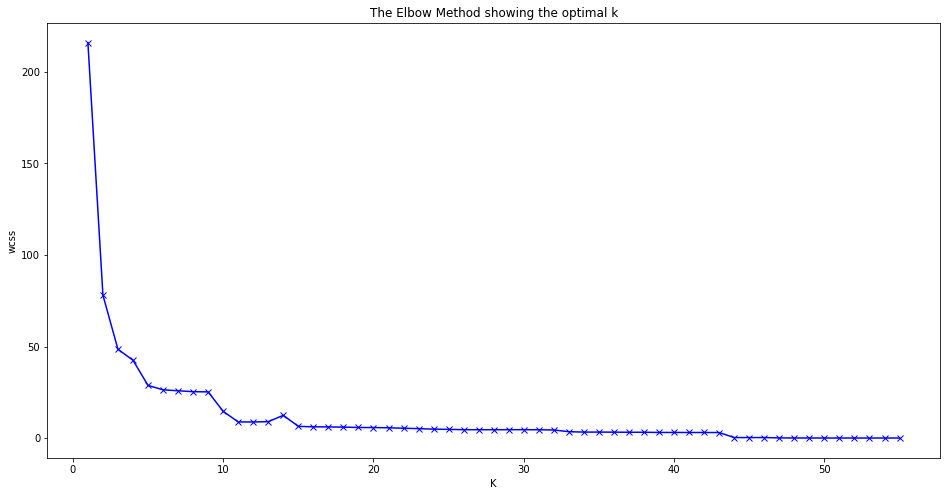

In [13]:
#calculate the inertia values and max distances from eachother, also check clustering to see which would be optimal K value

inertiaTable = pandas.DataFrame(columns = ['K', 'Inertia'])

kmeans = sklearn.cluster.KMeans(n_init = 1, max_iter = 10)

wcss = []

for i in range(1, 56):
    kmeans.n_clusters = i
    kmeans.init = norm.iloc[0:i]
    kmeans.fit(norm)
    inertia = kmeans.inertia_
    wcss.append(inertia)

k = range(1, 56)
inertiaTable.Inertia = wcss
inertiaTable.K = k[:]

inertiaTable

plt.figure(figsize=(16,8))
plt.plot(k, wcss, 'bx-')
plt.xlabel('K')
plt.ylabel('wcss')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Analyze Data
* We may be able to use linear regression to model see different correlations between variables.

In [14]:
#based off of the Elbow graph, the elbow appears to be at 5, hence we will use K = 5 for the clustering

stateCluster = pandas.DataFrame(columns = ['State', 'Cluster'])

#make our graph use K=5
km = sklearn.cluster.KMeans(n_clusters = 5, n_init = 1, max_iter = 10)
#initialize the first 5 states to be the 5 centroids
km.init = norm.iloc[0:5]
km.fit_predict(norm)
labels = km.labels_
stateCluster.Cluster = labels
stateCluster.index = copy.Location
stateCluster.State = quantative.index

stateCluster = stateCluster.sort_values('Cluster')
stateCluster



,State,Cluster
Location,,
Missouri,Missouri,0
Nebraska,Nebraska,1
Montana,Montana,1
Northern Mariana Islands,Northern Mariana Islands,1
Nevada,Nevada,1
New Hampshire,New Hampshire,1
New Mexico,New Mexico,1
North Dakota,North Dakota,1
Mississippi,Mississippi,1


In [15]:
#calculate the maxDistances within each cluster, calculate the amount of states within each cluster

size = pandas.DataFrame()
group = stateCluster.groupby('Cluster')

size['Cluster'] = range(5)

#Calculate Size
size['Size'] = group.size()

#Calculate distance matrixes

#cluster0
group0 = group.get_group(0)
matrix0 = dMatrix.loc[group0.index, group0.index]
matrix0 = matrix0.fillna(0)

#cluster1
group1 = group.get_group(1)
matrix1 = dMatrix.loc[group1.index, group1.index]
matrix1 = matrix1.fillna(0)

#cluster2
group2 = group.get_group(2)
matrix2 = dMatrix.loc[group2.index, group2.index]
matrix2 = matrix2.fillna(0)

#cluster3
group3 = group.get_group(3)
matrix3 = dMatrix.loc[group3.index, group3.index]
matrix3 = matrix3.fillna(0)

#cluster4
group4 = group.get_group(4)
matrix4 = dMatrix.loc[group4.index, group4.index]
matrix4 = matrix4.fillna(0)

size['MaxDistance'] = [numpy.max(numpy.max(matrix0)), numpy.max(numpy.max(matrix1)), numpy.max(numpy.max(matrix2)), 
                          numpy.max(numpy.max(matrix3)), numpy.max(numpy.max(matrix4))]

size = size.sort_values(by='Cluster')

size

,Cluster,Size,MaxDistance
0,0,1,0.000000
1,1,28,0.970414
2,2,7,2.954043
3,3,16,1.309068
4,4,3,4.756165


In [16]:
#reduce the data so that we have x, y values to plot PCA

reduced = pandas.DataFrame(columns = ['State', 'X', 'Y'])
pca = sklearn.decomposition.PCA(n_components = 2, svd_solver = 'full')
pca = pca.fit(norm)
pca = pca.transform(norm)
X = numpy.hsplit(pca, 2)
reduced.State = copy.Location
reduced.X = X[0]
reduced.Y = X[1]
reduced = reduced.sort_values(by='State')
reduced = reduced.set_index('State')

reduced

,X,Y
State,,
Alabama,-0.020308,0.469598
Alaska,-1.373744,0.048448
American Samoa,-1.520080,0.113108
Arizona,0.641043,0.076495
Arkansas,-0.668213,0.166080
California,7.477912,-1.240693
Colorado,-0.297007,-0.223959
Connecticut,-0.704021,-0.208629
Delaware,-1.301465,0.015287


In [17]:
clusterReduce = pandas.DataFrame(columns=['Cluster', 'X', 'Y'])

pca = sklearn.decomposition.PCA(n_components = 2, svd_solver = 'full')
pca.fit(norm)
transformed = pca.transform(km.cluster_centers_)
temp = numpy.hsplit(transformed, 2)
clusterReduce.Cluster = range(5)
clusterReduce.X = temp[0]
clusterReduce.Y = temp[1]
clusterReduce = clusterReduce.sort_values(by='Cluster')

clusterReduce

,Cluster,X,Y
0,0,1.317074,2.962355
1,1,-1.115161,0.060873
2,2,1.462628,-0.780651
3,3,0.038475,-0.043502
4,4,6.351141,0.497936


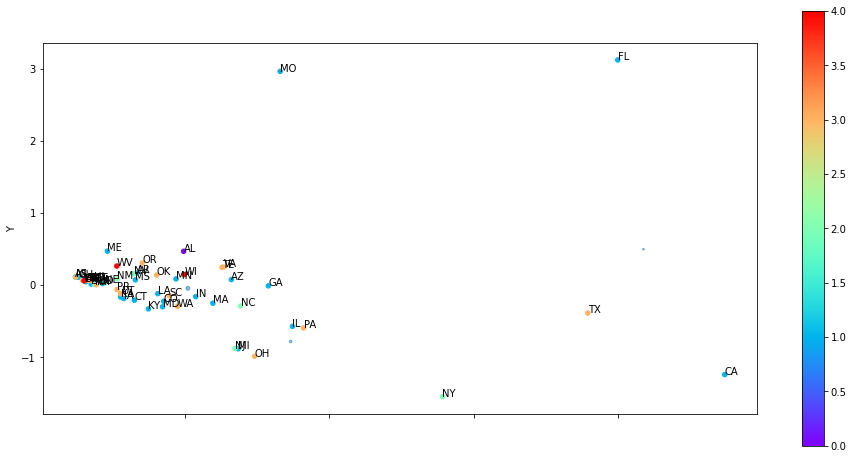

In [18]:
X = reduced.X
Y = reduced.Y
X2 = clusterReduce.X
Y2 = clusterReduce.Y
ax = reduced.plot.scatter('X', 'Y', c = stateCluster.Cluster, colormap = 'rainbow', figsize = (16, 8))
clusterReduce.plot.scatter('X', 'Y', s = size.Size, colormap = 'rainbow', alpha = 0.5, figsize = (16, 8), ax=ax)

ab = pandas.read_csv('Abbreviations.csv')

ax.axis('scaled')
for i,r in enumerate(ab):
    ax.annotate(r, (X[i], Y[i]))


# Changes and work distribution


We stayed the original course of analyzing covid19 route, however, we decided to focus in on the relationship with covid and vaccines to prove if the vaccines really helped with slowing the spread of covid. Another thing we changed was that we changed was the project notebook due to technical difficulties with the colab notebook which we previously used.

Emilio: Worked on cleaning up the cases and death data points as well as the bar graphs.
Will Pham: Worked on data gathering and the elbow/ k graph and scatter points.
Ari: Worked on creating the other scatter graph and clusters.
Will Yao: Worked on data cleaning, data gathering.

## Conclusion